In [1]:
import sys
import os
import importlib
# make the module available from the src directory
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from src.models.baseModels.resnet_regression import ResNetModel
importlib.reload(sys.modules['src.models.baseModels.resnet_regression'])

data_dir = '../datasets/artificial_data/'
dataset_name = 'SimpleNoisyImageGenerator'

resnet = ResNetModel(
    data_dir=f'{data_dir}{dataset_name}', 
    num_epochs=60,
    learning_rate=0.01,
    weight_decay=1e-4,
    early_stopping_tol=30,
    early_stopping_min_delta=10,
    depth=18,
)


resnet.load_data()
resnet.train()
resnet.evaluate()

Is cuda available:  True
Epoch 1/60, Train Loss: 7.62697360449462e+17, Val Loss: 2.222028745220399e+18
Epoch 2/60, Train Loss: 2291550168707.5146, Val Loss: 6709075142167.506
Epoch 3/60, Train Loss: 5818.068625084898, Val Loss: 16952.81145504117
Epoch 4/60, Train Loss: 48.22011267885249, Val Loss: 129.42250868678093
Epoch 5/60, Train Loss: 25.40401903111884, Val Loss: 63.887893825769424
Epoch 6/60, Train Loss: 14.511656558260004, Val Loss: 32.71239873766899
Epoch 7/60, Train Loss: 16.67817860461296, Val Loss: 36.82731917500496
Epoch 8/60, Train Loss: 16.05560065330343, Val Loss: 36.973307609558105
Epoch 9/60, Train Loss: 16.256635889093925, Val Loss: 37.191701114177704
Epoch 10/60, Train Loss: 15.212573234071122, Val Loss: 35.83168140053749
Epoch 11/60, Train Loss: 15.80012482785164, Val Loss: 35.5377476811409
Epoch 12/60, Train Loss: 14.531952908698548, Val Loss: 33.73542621731758
Epoch 13/60, Train Loss: 14.850433552518805, Val Loss: 34.69010418653488
Epoch 14/60, Train Loss: 15.7181

In [11]:
from src.dataLoaders.DataLoader import DataSetLoader
importlib.reload(sys.modules['src.dataLoaders.DataLoader'])

dataset = 'SimpleNoisyImageGenerator'
data_loader = DataSetLoader(data_dir=f'{data_dir}{dataset}')
data_loader.load_data()

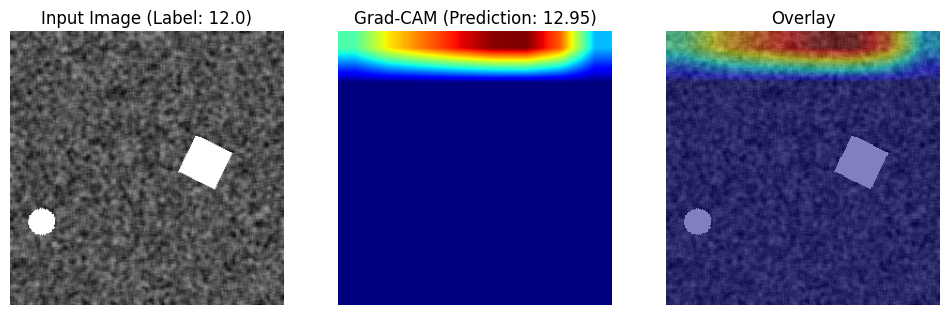

In [40]:
from src.XAI.ModifiedGradCam import ModifiedGradCam
importlib.reload(sys.modules['src.XAI.ModifiedGradCam'])
importlib.reload(sys.modules['src.XAI.utils.SaveFiles'])

grad_cam = ModifiedGradCam(resnet)
grad_cam.generate_grad_cam(index=6)

Max value in heatmap before ReLU is: tensor(0.0006, device='cuda:0', grad_fn=<MaxBackward1>)


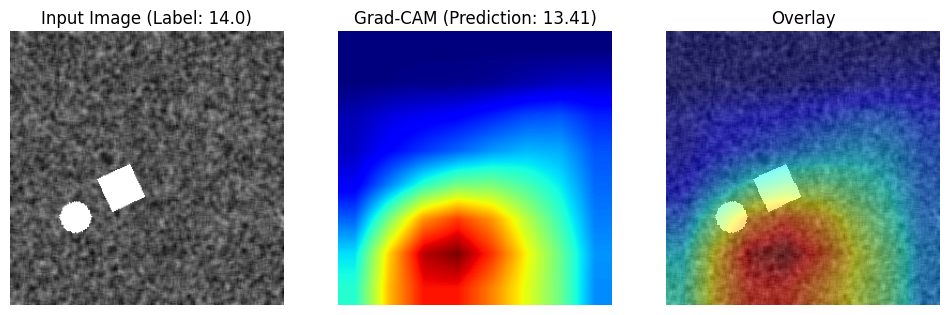

Max value in heatmap before ReLU is: tensor(0.0006, device='cuda:0', grad_fn=<MaxBackward1>)


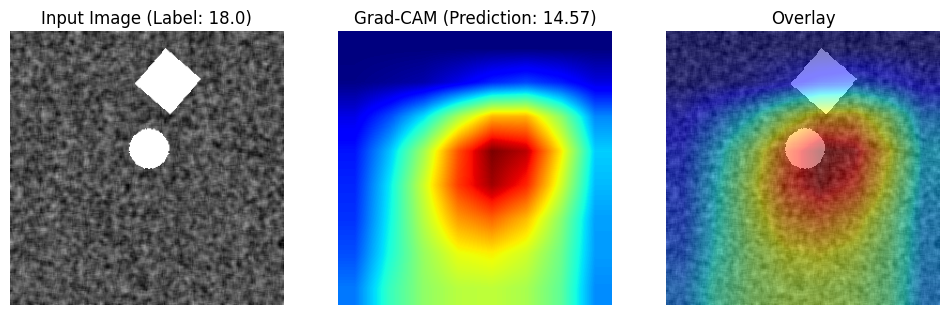

Max value in heatmap before ReLU is: tensor(0.0007, device='cuda:0', grad_fn=<MaxBackward1>)


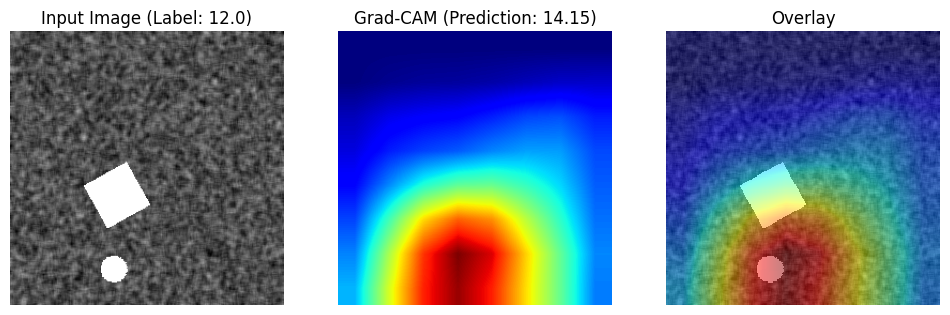

Max value in heatmap before ReLU is: tensor(0.0005, device='cuda:0', grad_fn=<MaxBackward1>)


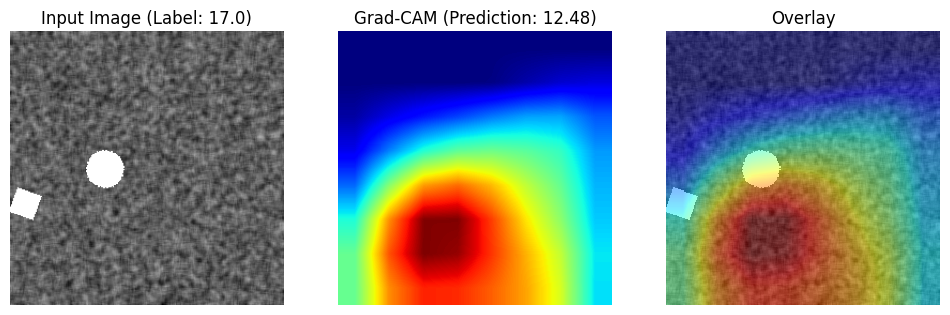

Max value in heatmap before ReLU is: tensor(0.0005, device='cuda:0', grad_fn=<MaxBackward1>)


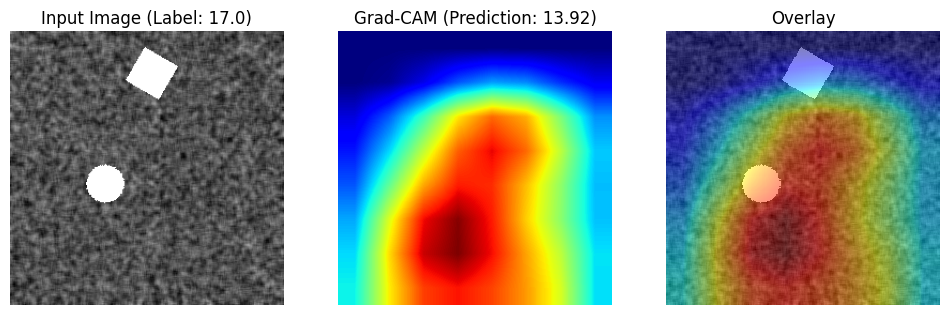

Max value in heatmap before ReLU is: tensor(0.0005, device='cuda:0', grad_fn=<MaxBackward1>)


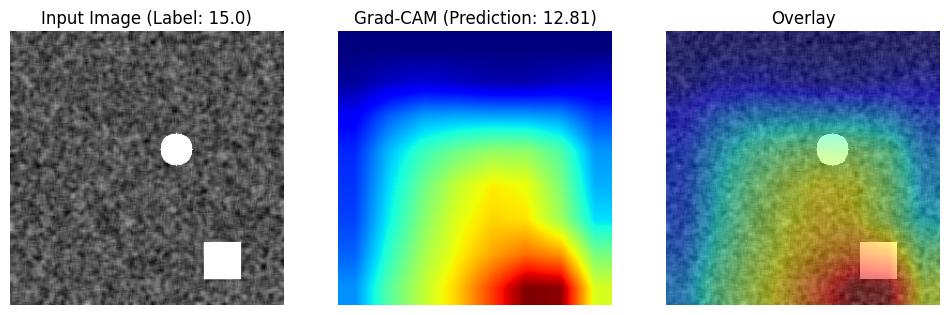

Max value in heatmap before ReLU is: tensor(0.0005, device='cuda:0', grad_fn=<MaxBackward1>)


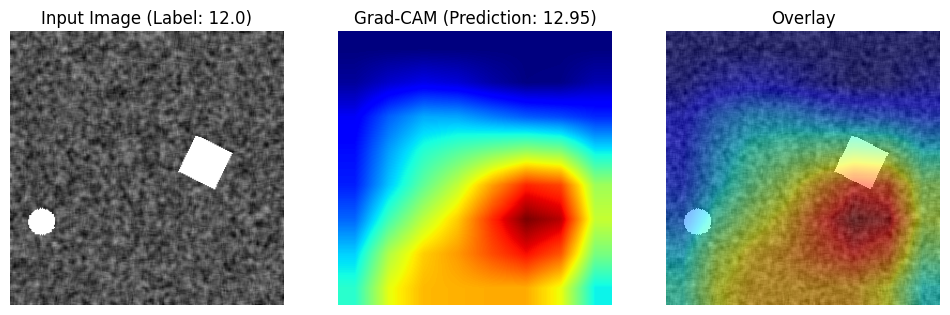

Max value in heatmap before ReLU is: tensor(0.0005, device='cuda:0', grad_fn=<MaxBackward1>)


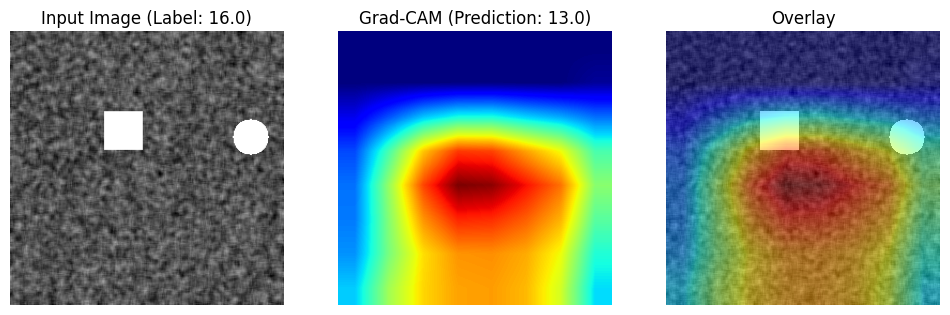

Max value in heatmap before ReLU is: tensor(0.0005, device='cuda:0', grad_fn=<MaxBackward1>)


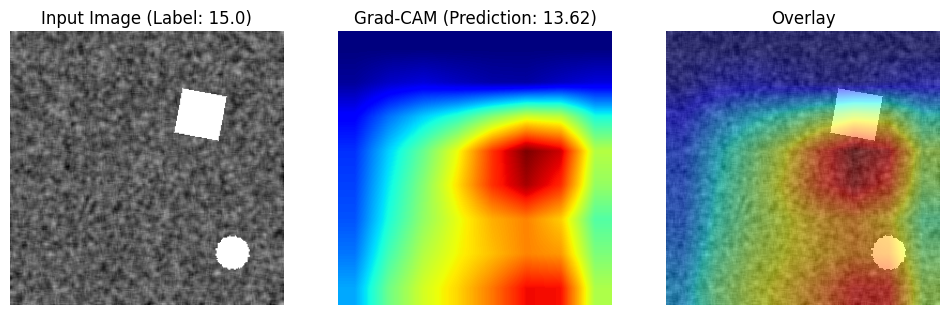

Max value in heatmap before ReLU is: tensor(0.0006, device='cuda:0', grad_fn=<MaxBackward1>)


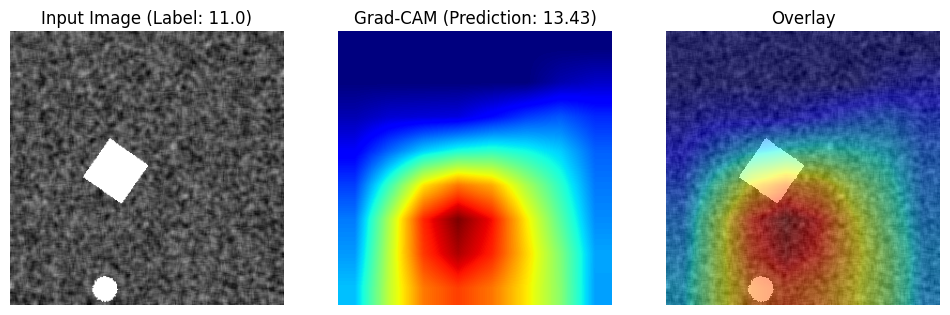

Max value in heatmap before ReLU is: tensor(0.0004, device='cuda:0', grad_fn=<MaxBackward1>)


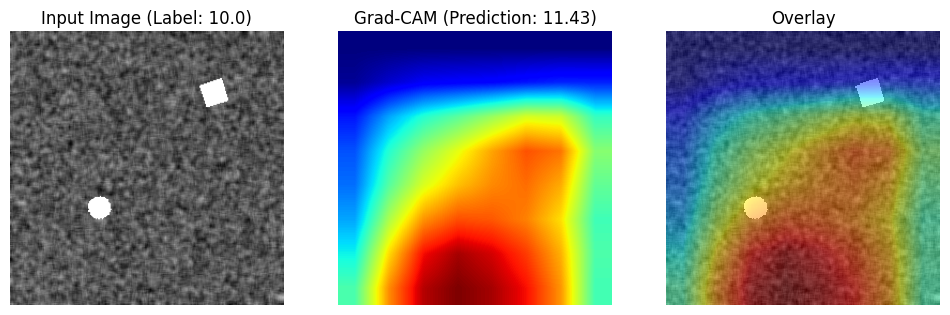

Max value in heatmap before ReLU is: tensor(0.0006, device='cuda:0', grad_fn=<MaxBackward1>)


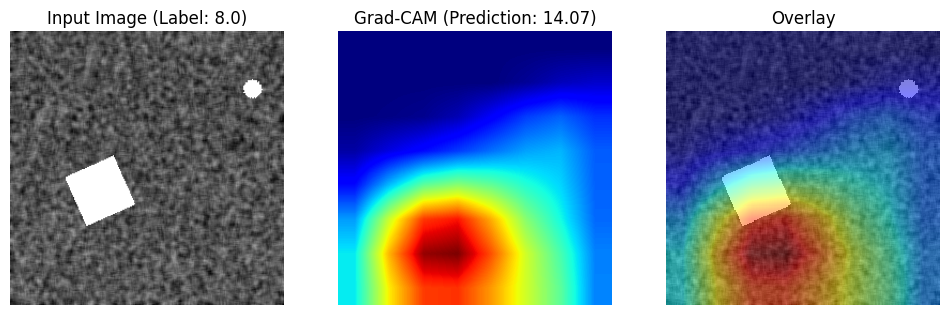

Max value in heatmap before ReLU is: tensor(0.0006, device='cuda:0', grad_fn=<MaxBackward1>)


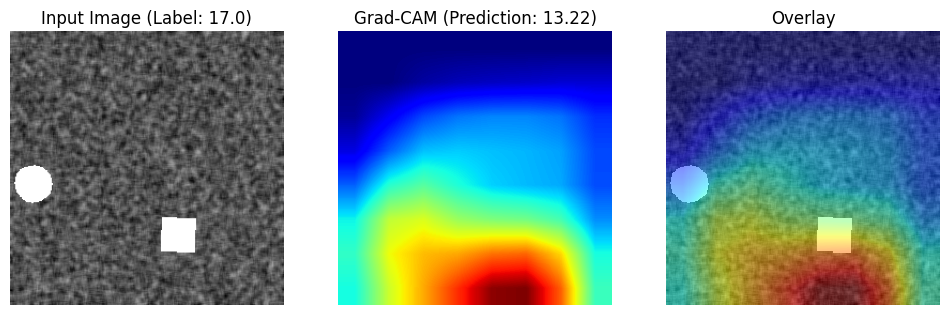

Max value in heatmap before ReLU is: tensor(0.0004, device='cuda:0', grad_fn=<MaxBackward1>)


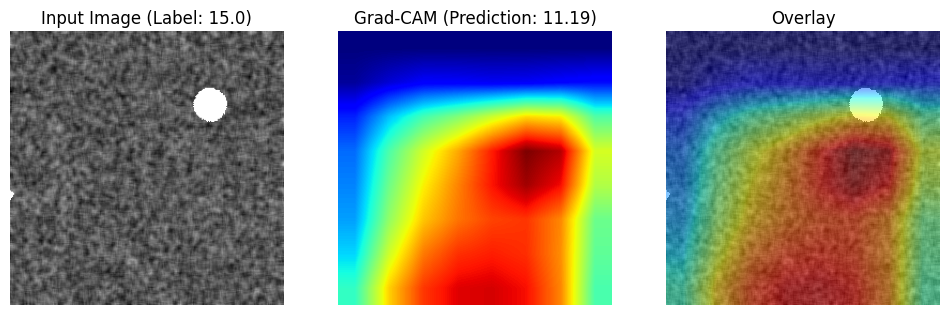

Max value in heatmap before ReLU is: tensor(0.0006, device='cuda:0', grad_fn=<MaxBackward1>)


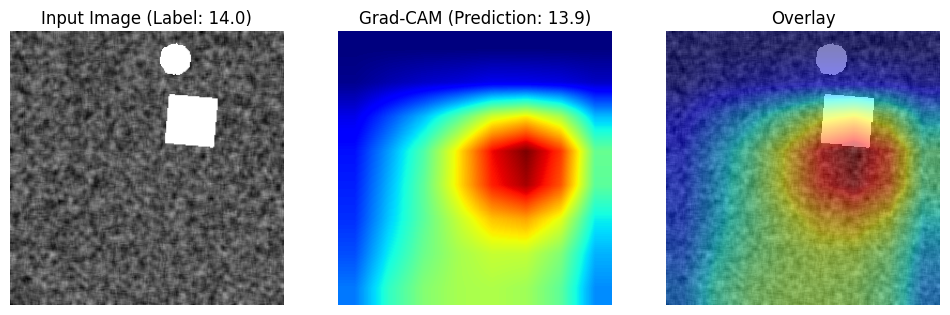

Max value in heatmap before ReLU is: tensor(0.0004, device='cuda:0', grad_fn=<MaxBackward1>)


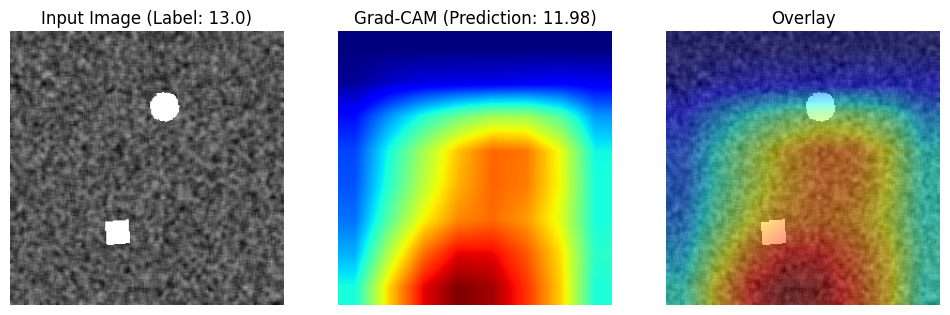

Max value in heatmap before ReLU is: tensor(0.0006, device='cuda:0', grad_fn=<MaxBackward1>)


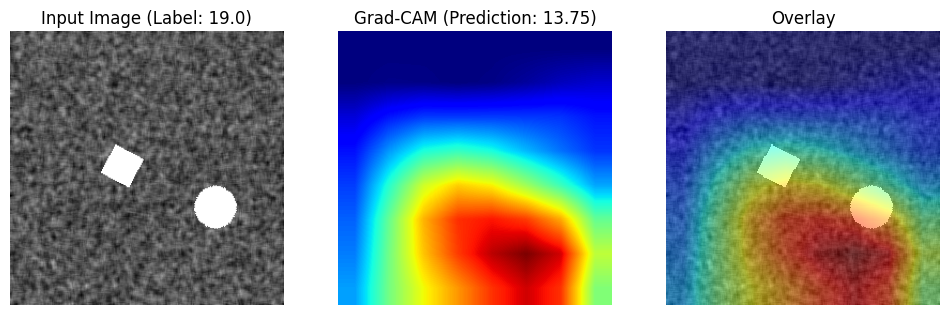

Max value in heatmap before ReLU is: tensor(0.0005, device='cuda:0', grad_fn=<MaxBackward1>)


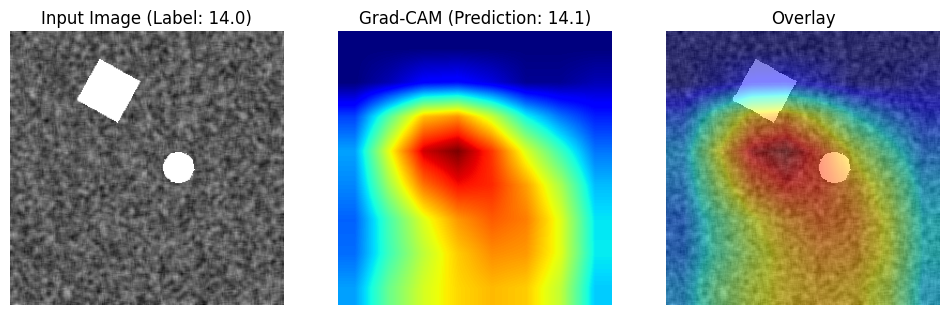

Max value in heatmap before ReLU is: tensor(0.0006, device='cuda:0', grad_fn=<MaxBackward1>)


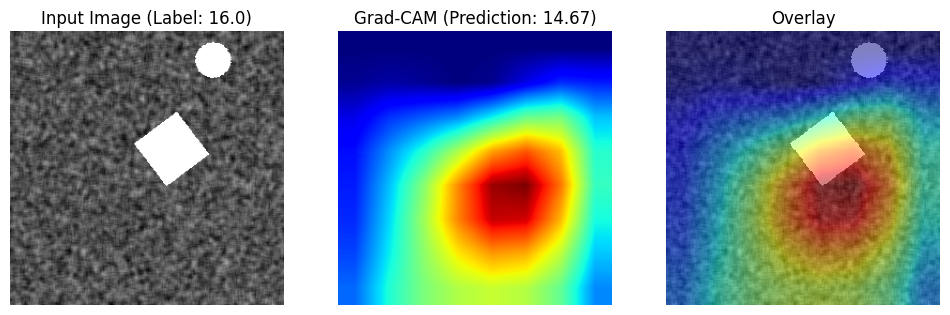

Max value in heatmap before ReLU is: tensor(0.0004, device='cuda:0', grad_fn=<MaxBackward1>)


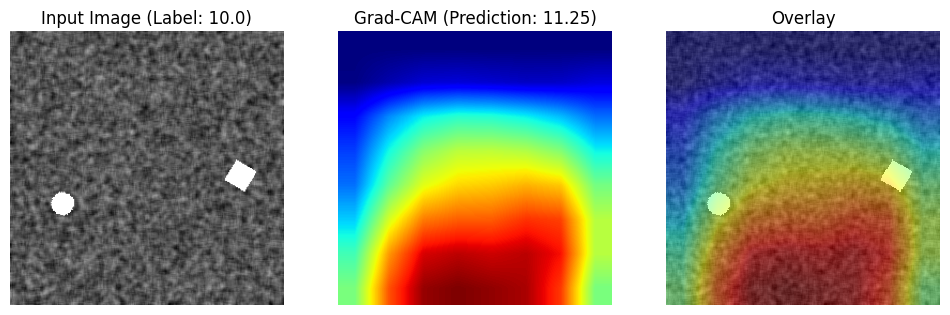

In [12]:
from src.XAI.GradCam import GradCamResnet
importlib.reload(sys.modules['src.XAI.GradCam'])
importlib.reload(sys.modules['src.XAI.utils.SaveFiles'])

grad_cam = GradCamResnet(resnet)
grad_cam.generateMultipleGradCam(20, save_output=True, save_dir='gradcam_output')

In [50]:
from src.XAI.DeepShap import DeepShapResnet
importlib.reload(sys.modules['src.XAI.DeepShap'])

# Initialize XAI instance
deepShap = DeepShapResnet(modelWrapper=resnet)

for i in range(5):
    deepShap.generate_deep_shap(index=i)

RuntimeError: Cannot use both regular backward hooks and full backward hooks on a single Module. Please use only one of them.